In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb
import IPython

# Loading the data

In [136]:
df = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')

In [137]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [138]:
df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [139]:
df.shape

(9990, 60)

In [140]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df['label'] = LabelEncoder().fit_transform(df['label'])
X = df.drop(['label', 'length', 'filename'], axis = 1)
scaller = MinMaxScaler()
X = pd.DataFrame(scaller.fit_transform(X), columns = X.columns)
y = df['label']

In [141]:
X.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.424094,0.658319,0.294161,0.082058,0.348095,0.086759,0.542920,0.094888,0.442597,0.125376,...,0.428798,0.071290,0.381694,0.095385,0.372135,0.078320,0.424239,0.045527,0.497090,0.062669
std,0.140831,0.091239,0.155216,0.109937,0.151591,0.090744,0.169479,0.082134,0.185983,0.114727,...,0.086904,0.050458,0.091780,0.068975,0.089791,0.060957,0.086915,0.036473,0.075205,0.051027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324718,0.610570,0.187559,0.018842,0.233465,0.025532,0.432627,0.038560,0.308069,0.043014,...,0.373100,0.041399,0.321023,0.053509,0.315700,0.041832,0.369204,0.024059,0.452898,0.032663
50%,0.432199,0.660514,0.272410,0.045723,0.349992,0.055130,0.539552,0.071945,0.449993,0.089272,...,0.429000,0.059151,0.377745,0.077252,0.372028,0.061304,0.420753,0.035407,0.495467,0.048396
75%,0.522026,0.717174,0.397122,0.095993,0.451600,0.117164,0.651040,0.127544,0.558754,0.174186,...,0.484886,0.084893,0.437818,0.113792,0.426703,0.093561,0.475444,0.054609,0.541958,0.074631
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Deep Learning Model - Only Dense Layers

In [143]:
import tensorflow as tf
from tensorflow import keras

In [144]:
model = tf.keras.Sequential(
        layers = [
            tf.keras.layers.Flatten(input_shape=(57,)),
            tf.keras.layers.Dense(512, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(256, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(128, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(64, activation=tf.keras.activations.elu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
        ]
)

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 57)                0         
                                                                 
 dense_111 (Dense)           (None, 512)               29696     
                                                                 
 batch_normalization_42 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dense_112 (Dense)           (None, 256)               131328    
                                                                 
 batch_normalization_43 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dense_113 (Dense)           (None, 128)             

In [145]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Lion(),
              metrics='accuracy'
             )

In [146]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=200,
                    callbacks=EarlyStopping(patience=5))

Epoch 1/200
235/235 [==============================] - 3s 7ms/step - loss: 1.1784 - accuracy: 0.5916 - val_loss: 1.9209 - val_accuracy: 0.2770
Epoch 2/200
235/235 [==============================] - 1s 6ms/step - loss: 0.7914 - accuracy: 0.7277 - val_loss: 1.0853 - val_accuracy: 0.6089
Epoch 3/200
235/235 [==============================] - 1s 6ms/step - loss: 0.6446 - accuracy: 0.7819 - val_loss: 0.6096 - val_accuracy: 0.8022
Epoch 4/200
235/235 [==============================] - 1s 6ms/step - loss: 0.5314 - accuracy: 0.8191 - val_loss: 0.5888 - val_accuracy: 0.8094
Epoch 5/200
235/235 [==============================] - 1s 6ms/step - loss: 0.4562 - accuracy: 0.8500 - val_loss: 0.6595 - val_accuracy: 0.7770
Epoch 6/200
235/235 [==============================] - 1s 6ms/step - loss: 0.3997 - accuracy: 0.8648 - val_loss: 0.5565 - val_accuracy: 0.8171
Epoch 7/200
235/235 [==============================] - 1s 6ms/step - loss: 0.3655 - accuracy: 0.8733 - val_loss: 0.4949 - val_accuracy: 0.8371

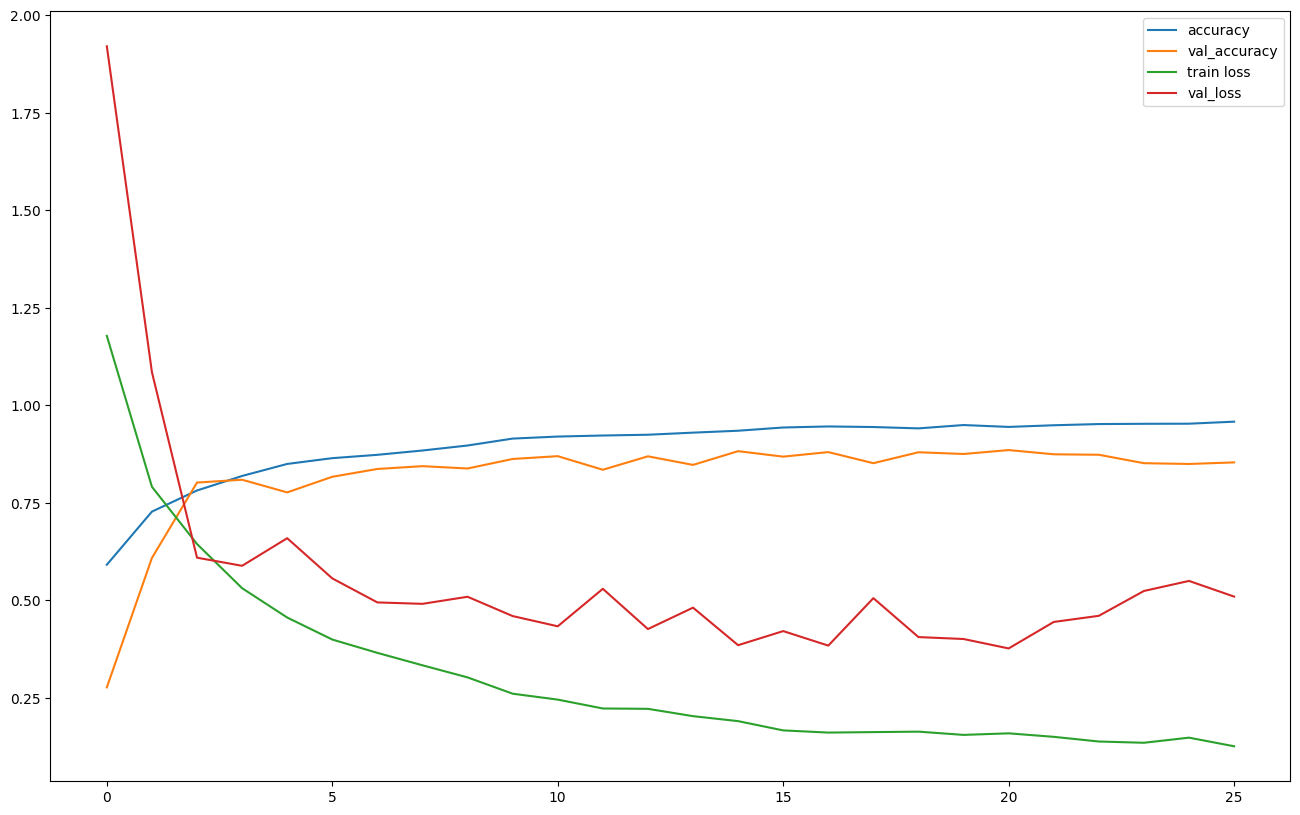

In [152]:
# plot model train en val history
plt.figure(figsize = (16, 10))
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [164]:
#hyperparameter tuning
import keras_tuner

def build_model(hp):
    model = tf.keras.Sequential(
        layers = [
            tf.keras.layers.Flatten(input_shape=(57,)),
            tf.keras.layers.Dense(units = hp.Choice('dense1', [1024, 512]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units = hp.Choice('dense2', [512, 256]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units = hp.Choice('dense3', [256, 128]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(units = hp.Choice('dense4', [256, 128]), activation=tf.keras.activations.swish),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
        ]
    )
    
    model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.AdamW(),
              metrics='accuracy'
             )
    
    return model

tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10
)

tuner.search_space_summary()

Search space summary
Default search space size: 4
dense1 (Choice)
{'default': 1024, 'conditions': [], 'values': [1024, 512], 'ordered': True}
dense2 (Choice)
{'default': 512, 'conditions': [], 'values': [512, 256], 'ordered': True}
dense3 (Choice)
{'default': 256, 'conditions': [], 'values': [256, 128], 'ordered': True}
dense4 (Choice)
{'default': 256, 'conditions': [], 'values': [256, 128], 'ordered': True}


In [166]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 13s]
val_accuracy: 0.7962369918823242

Best val_accuracy So Far: 0.8286629319190979
Total elapsed time: 00h 02m 14s


In [178]:
#getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [175]:
#training the best model
history_best = best_model.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),
                              callbacks = EarlyStopping(patience=10),
                              epochs = 200)

Epoch 1/200
235/235 [==============================] - 6s 8ms/step - loss: 0.3028 - accuracy: 0.8952 - val_loss: 0.5997 - val_accuracy: 0.8231
Epoch 2/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2677 - accuracy: 0.9107 - val_loss: 0.5646 - val_accuracy: 0.8259
Epoch 3/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2298 - accuracy: 0.9183 - val_loss: 0.5333 - val_accuracy: 0.8299
Epoch 4/200
235/235 [==============================] - 2s 7ms/step - loss: 0.2018 - accuracy: 0.9342 - val_loss: 0.6352 - val_accuracy: 0.8038
Epoch 5/200
235/235 [==============================] - 2s 7ms/step - loss: 0.1859 - accuracy: 0.9353 - val_loss: 0.5698 - val_accuracy: 0.8419
Epoch 6/200
235/235 [==============================] - 2s 7ms/step - loss: 0.1980 - accuracy: 0.9293 - val_loss: 0.5206 - val_accuracy: 0.8423
Epoch 7/200
235/235 [==============================] - 2s 7ms/step - loss: 0.1814 - accuracy: 0.9399 - val_loss: 0.4475 - val_accuracy: 0.8783

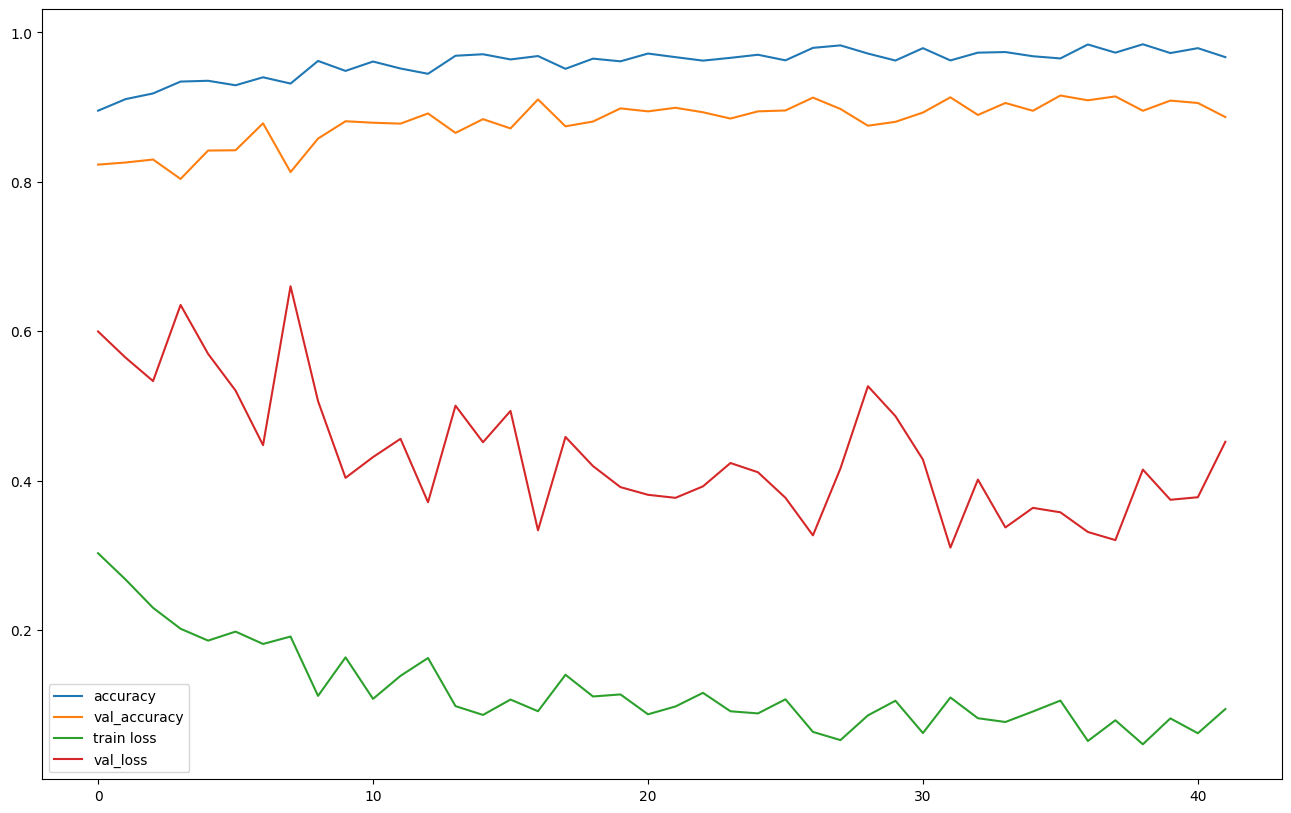

In [176]:
plt.figure(figsize = (16, 10))
plt.plot(history_best.history['accuracy'], label = 'accuracy')
plt.plot(history_best.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history_best.history['loss'], label = 'train loss')
plt.plot(history_best.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

79/79 [==============================] - 0s 2ms/step


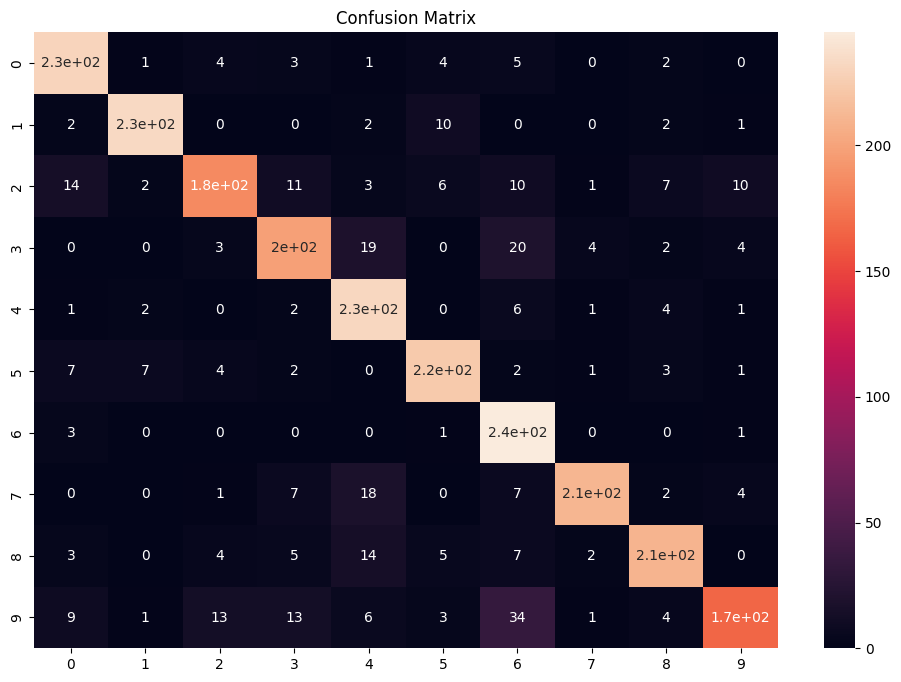

In [184]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = best_model.predict(X_test)

# confusion matrix for best model
y_pred = np.argmax(model.predict(X_test), axis =1)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12,8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True)
plt.show()